In [1]:
#!/usr/bin/env python 

In [43]:
# Importing the necessary packages
import re 
from subprocess import call 
import pandas as pd
import seaborn as sn 
from matplotlib import pyplot as plt 

In [45]:
# Loading in some necessary variables and constants
%matplotlib inline 
sn.set_palette('husl')

# Opening the dataset and loading it into memory 
filename = 'inputdata.csv'
with open(filename, 'r') as file:
    data = file.read() 

In [46]:
# Removing the old data set and Saving the filtered dataset into disk. 
call('rm -rf inputdata.csv', shell=True)

0

In [47]:
data = data.replace(']', '').replace('[', '')
data = data.replace("'", "")

# Saving the data into a new dataset
new_dataset = 'inputdata.csv'
with open(new_dataset, 'a+') as f:
    f.write(data)
    f.close() 

In [48]:
# Filtering the dataset into two different labels (questions and conversation)
df = pd.read_csv('inputdata.csv' , header=None, error_bad_lines=False)

b'Skipping line 10: expected 2 fields, saw 3\nSkipping line 14: expected 2 fields, saw 3\nSkipping line 15: expected 2 fields, saw 3\nSkipping line 19: expected 2 fields, saw 3\nSkipping line 20: expected 2 fields, saw 3\nSkipping line 25: expected 2 fields, saw 3\nSkipping line 26: expected 2 fields, saw 3\nSkipping line 28: expected 2 fields, saw 3\nSkipping line 32: expected 2 fields, saw 3\nSkipping line 33: expected 2 fields, saw 3\nSkipping line 35: expected 2 fields, saw 3\nSkipping line 114: expected 2 fields, saw 3\nSkipping line 116: expected 2 fields, saw 3\nSkipping line 119: expected 2 fields, saw 3\nSkipping line 121: expected 2 fields, saw 3\nSkipping line 124: expected 2 fields, saw 3\nSkipping line 126: expected 2 fields, saw 3\nSkipping line 129: expected 2 fields, saw 3\nSkipping line 133: expected 2 fields, saw 3\nSkipping line 138: expected 2 fields, saw 3\nSkipping line 144: expected 2 fields, saw 3\nSkipping line 149: expected 2 fields, saw 3\nSkipping line 151: 

In [49]:
df

,0,1
0,conversation,hello
1,conversation,hello
2,conversation,how far
3,conversation,hello
4,conversation,how far
...,...,...
838,conversation,hello
839,question,what is my bank statement ?
840,conversation,hello
841,question,what is my bank statement ?


In [50]:
# Converting the columns into labels and messages 
df.columns = ['label', 'message']

In [51]:
# Samples for the conversation and question dataset.
df['label'].count() 
df['message'].count() 

843

In [56]:
# 
df.groupby('message').describe() 

label                          
                                count unique           top freq
message                                                        
 absolutely yeah                   12      1  conversation   12
 am great                          13      1  conversation   13
 and how old are you aipa ?         1      1  conversation    1
 and where am i located now  ?      2      1      question    2
 define neurons ?                   2      1      question    2
...                               ...    ...           ...  ...
 yeah                              11      1  conversation   11
 yeah sure                         16      1  conversation   16
 yeha sure                         17      1      question   17
 yes                                1      1  conversation    1
 yes i know                         6      1  conversation    6

[106 rows x 4 columns]

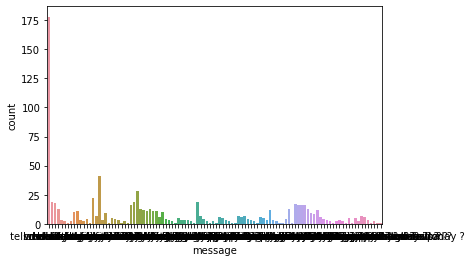

In [54]:
sn.countplot(data=df, x='message')
plt.show() 

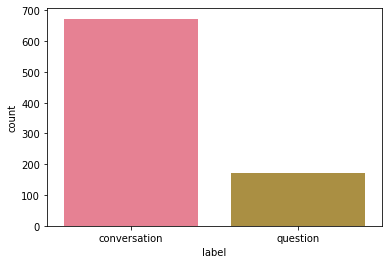

In [55]:
sn.countplot(data=df, x='label')
plt.show() 

In [57]:
# Cleaning the text
import string 
from nltk.corpus import stopwords 
from nltk import PorterStemmer as Stemmer
def process(text):
    # turn the texts into lowercase
    text = text.lower() 
    # remove punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    # remove stopwords 
    text = [t for t in text.split() if t not in stopwords.words('english')]
    # Stemming the words 
    stemmer = Stemmer() 
    text = [stemmer.stem(t) for t in text]
    # Return the token list 
    return text 

In [58]:
# Building a model 
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
tfidfv = TfidfVectorizer(analyzer = process)

In [60]:
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import MultinomialNB 
model = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)),
     ('classifier', MultinomialNB())
    
])

In [61]:
# performing a training and a spliting test 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.20, random_state = 21)

In [62]:
model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer=<function process at 0x7f0ba766ed90>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [63]:
predictions = model.predict(x_test)
model.score(x_test, y_test)

0.9526627218934911

In [74]:
# Defining a function to run and use the model for classfication.
def detect_conversation(s):
    result = model.predict([s])[0]
    #return result

detect_conversation('so um, how old are you today ? ')

458                  how much do i have in my account ? 
313     so define or tell me what a neuron is pleasee...
65                                 how is your family ? 
71                                        how are you ? 
397                                           how far ? 
                             ...                        
301                                           okay nice 
694                              so how are you today ? 
292                                           ok thanks 
794                                    i am good thanks 
713                             how is your day going ? 
Name: message, Length: 169, dtype: object